In [46]:
import SBP as sb
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sp 
np.set_printoptions(linewidth=np.inf)
from numpy.polynomial.legendre import legvander

In [62]:

# This function is for creating a triangular initial condition
def triangle(x):
    """
    Triangular (hat) function on [-1,1]:
      triangle(x) = 1 - |x|   for x in [-1,1],
                    0         otherwise.
    Accepts scalar or array x.
    """
    x = np.asarray(x)
    # compute 1 - |x|, then zero out anything outside [-1,1]
    u = 1 - np.abs(x)
    u = np.where((x < -1) | (x > 1), 0.0, u)
    return u

# This function is for converting from nodal to modal represntation of the solution vecotr
def nodal_to_modal(u, x, w):
    """
    Convert nodal values u at points x with weights w
    into modal Legendre coefficients a.
    
    u : array_like, shape (n+1,)   — nodal values
    x : array_like, shape (n+1,)   — LGL nodes
    w : array_like, shape (n+1,)   — corresponding LGL weights
    
    returns
    a : ndarray, shape (n+1,)      — modal Legendre coefficients
    """
    n = len(u) - 1
    
    # 1) Build Legendre‐Vandermonde: V[j,i] = P_i(x[j]) for i=0..n
    V = legvander(x, n)           # shape = (n+1, n+1)
    
    # 2) Compute weighted inner‐products β_i = Σ_j w[j]*P_i(x[j])*u[j]
    beta = V.T.dot(w * u)         # shape = (n+1,)
    
    # 3) Scale by (2i+1)/2 to get a_i
    i = np.arange(n+1)
    a = beta * (2*i + 1) / 2      # shape = (n+1,)
    return a

# This function takes in a lower order solution and kills the highest frequency 
def modal_frequency_reduction(u, x, w):
    """
    Convert nodal values u at points x with weights w
    into modal Legendre coefficients a.
    
    u : array_like, shape (n+1,)   — nodal values
    x : array_like, shape (n+1,)   — LGL nodes
    w : array_like, shape (n+1,)   — corresponding LGL weights
    
    returns
    a : ndarray, shape (n+1,)      — modal Legendre coefficients
    """
    n = len(u) - 1
    
    # 1) Build Legendre‐Vandermonde: V[j,i] = P_i(x[j]) for i=0..n
    V = legvander(x, n)           # shape = (n+1, n+1)
    
    # 2) Compute weighted inner‐products β_i = Σ_j w[j]*P_i(x[j])*u[j]
    beta = V.T.dot(w * u)         # shape = (n+1,)
    
    # 3) Scale by (2i+1)/2 to get a_i
    i = np.arange(n+1)
    a = beta * (2*i + 1) / 2      # shape = (n+1,)
    
    # 4) Killing the highest frequency term
    a[-1] = 0
    
    # 5) Return Modal to Nodal 
    a = V.dot(a)
    return a

# This function calculates the energy of the highest mode in a modal representation of a solution
def fractional_energy_highest_mode(a):
    """
    Compute the fraction of total L²‐energy contained in the highest Legendre mode.
    
    Parameters
    ----------
    a : array_like, shape (n+1,)
        Modal coefficients [a₀, a₁, …, aₙ] of a polynomial of degree n.
    
    Returns
    -------
    float
        Fractional energy in mode n:
          Eₙ / Σ_{i=0}ⁿ Eᵢ,
        where Eᵢ = aᵢ²·(2/(2i+1)).
    """
    a = np.asarray(a)
    n = a.size - 1
    i = np.arange(a.size)
    # energy in each mode: E[i] = a[i]**2 * (2/(2*i+1))
    E = a**2 * (2/(2*i + 1))
    return E[n] / E.sum()





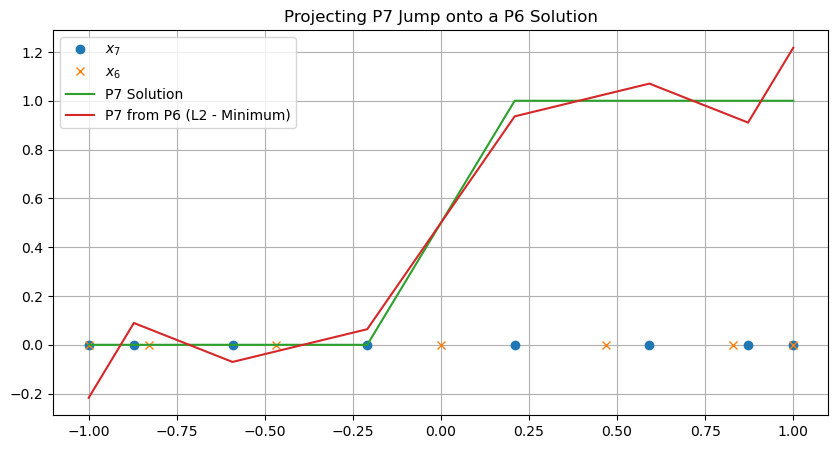

In [71]:
############
# Sandro's Projection-Interpolation
############

n = 7 
k = 6
x7 , w7 = sb.lgl(n)
x6 , w6 = sb.lgl(k)

P6 = np.linalg.inv(sb.sbp_p(k))
P7 = sb.sbp_p(n)

##############################################
#G = np.array([sb.lagrange(n,x7[i]) for i in range(n+1)])
L6 = np.array([sb.lagrange(k,x7[i]) for i in range(n+1)]) # Using the 

u7 = np.where(x7 < 0, 0.0, 1.0)


u6 = P6@(L6.T.dot(P7@u7))
##############################################


##############################################
u6_t = u7.T@np.array([sb.lagrange(k,x7[i]) for i in range(n+1)])
u7_6t2 = L6.dot(u6_t)

u7_6t1 = L6.dot(u6)
##############################################




fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x7,np.zeros_like(x7), "o",label="$x_7$")
ax.plot(x6,np.zeros_like(x6), "x",label="$x_6$")
ax.plot(x7,u7,label="P7 Solution")
#ax.plot(x6,u6,label="P6 Solution - Naive")
#ax.plot(x6,u6_t,label="P6 Solution - Minimum L2")
#ax.plot(x7,u7_6t2, label="P7 from P6 (Naive-Approach)")
ax.plot(x7,u7_6t1,label="P7 from P6 (L2 - Minimum)")
ax.legend()
ax.grid()
ax.set_title("Projecting P7 Jump onto a P6 Solution")
plt.show()


In [ ]:
############
# Sandro's Projection-Interpolation
############
xf = np.linspace(-1, 1, 500)
n = 7 
k = 6
x7 , w7 = sb.lgl(n)
x6 , w6 = sb.lgl(k)

P6 = np.linalg.inv(sb.sbp_p(k))
P7 = sb.sbp_p(n)

##############################################
#G = np.array([sb.lagrange(n,x7[i]) for i in range(n+1)])
L6 = np.array([sb.lagrange(k,x7[i]) for i in range(n+1)]) # Using the 

u7 = np.where(x7 < 0, 0.0, 1.0)


u6 = P6@(L6.T.dot(P7@u7))
##############################################


##############################################
u6_t = u7.T@np.array([sb.lagrange(k,x7[i]) for i in range(n+1)])
u7_6t2 = L6.dot(u6_t)

u7_6t1 = L6.dot(u6)
##############################################

#########################################################
# Visualizing the Lagrange Interpolation 
xf = np.linspace(-1, 1, 500)
Mn = np.vstack([ sb.lagrange(n, xi) for xi in xf ])   # shape (500×n)
Mk = np.vstack([ sb.lagrange(k, xi) for xi in xf ])   # shape (500×k or (n-1))


#########################################################


fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x7,np.zeros_like(x7), "o",label="$x_7$")
ax.plot(x6,np.zeros_like(x6), "x",label="$x_6$")
ax.plot(x7,u7,label="P7 Solution")
#ax.plot(x6,u6,label="P6 Solution - Naive")
#ax.plot(x6,u6_t,label="P6 Solution - Minimum L2")
#ax.plot(x7,u7_6t2, label="P7 from P6 (Naive-Approach)")
ax.plot(x7,u7_6t1,label="P7 from P6 (L2 - Minimum)")
ax.legend()
ax.grid()
ax.set_title("Projecting P7 Jump onto a P6 Solution")
plt.show()

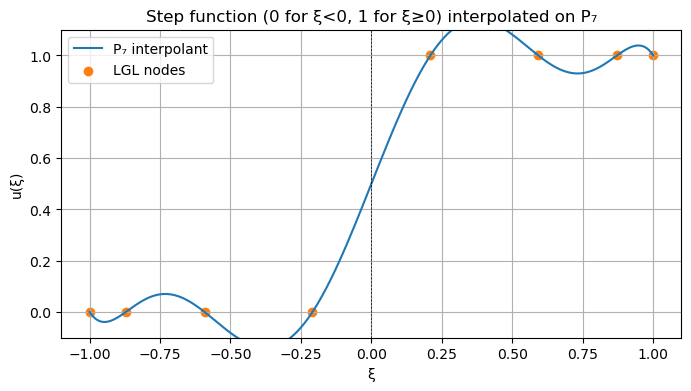

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Choose degree
n = 7

# 2) Get the LGL nodes (and weights, though weights aren’t needed here)
x7, _ = sb.lgl(n)        # shape = (8,)

# 3) Sample the step: 0 for x<0, 1 for x>=0
u7 = np.where(x7 < 0, 0.0, 1.0)   # length-8

# 4) Build the collocation‐to‐fine‐grid matrix
#    Let xf be a fine set of points in [-1,1]:
xf = np.linspace(-1, 1, 500)
#    M[j,i] = ℓᵢ⁽⁷⁾(xf[j])
M = np.vstack([ sb.lagrange(n, xi) for xi in xf ])   # shape (500×8)

# 5) Evaluate the P₇‐polynomial at those fine points
u_fine = M.dot(u7)       # shape = (500,)

# 6) Plot
plt.figure(figsize=(8,4))
plt.plot(xf,   u_fine,  '-', label='P₇ interpolant')
plt.scatter(x7, u7,     c='C1', marker='o', label='LGL nodes')
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)
plt.ylim(-0.1, 1.1)
plt.xlabel('ξ')
plt.ylabel('u(ξ)')
plt.title('Step function (0 for ξ<0, 1 for ξ≥0) interpolated on P₇')
plt.legend()
plt.grid(True)
plt.show()


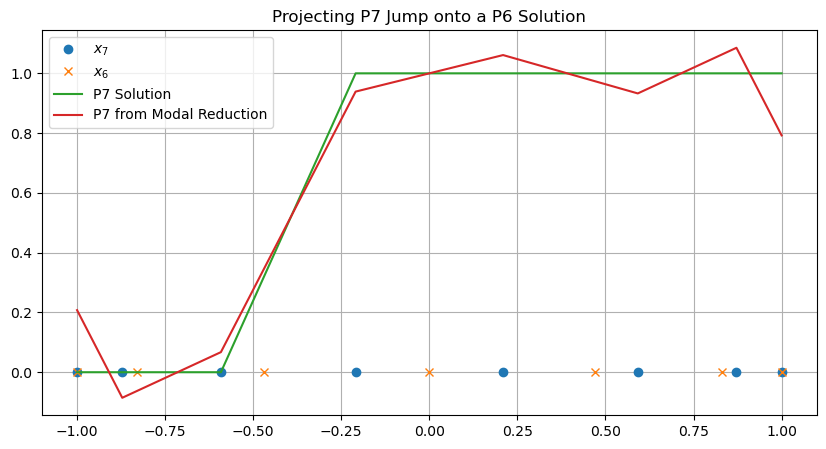

In [48]:
#######
# Vmonde Approach
#######

n = 7 
k = 6
x7 , w7 = sb.lgl(n)
x6 , w6 = sb.lgl(k)


##############################################
#G = np.array([sb.lagrange(n,x7[i]) for i in range(n+1)])
L6 = np.array([sb.lagrange(k,x7[i]) for i in range(n+1)]) # Using the 

u7 = np.ones(n+1)
u7[0:3] = 0
u7_m = modal_frequency_reduction(u7, x7, w7)
##############################################




fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x7,np.zeros_like(x7), "o",label="$x_7$")
ax.plot(x6,np.zeros_like(x6), "x",label="$x_6$")
ax.plot(x7,u7,label="P7 Solution")
#ax.plot(x6,u6,label="P6 Solution - Naive")
#ax.plot(x6,u6_t,label="P6 Solution - Minimum L2")
#ax.plot(x7,u7_6t2, label="P7 from P6 (Naive-Approach)")
ax.plot(x7,u7_m,label="P7 from Modal Reduction")
ax.legend()
ax.grid()
ax.set_title("Projecting P7 Jump onto a P6 Solution")
plt.show()


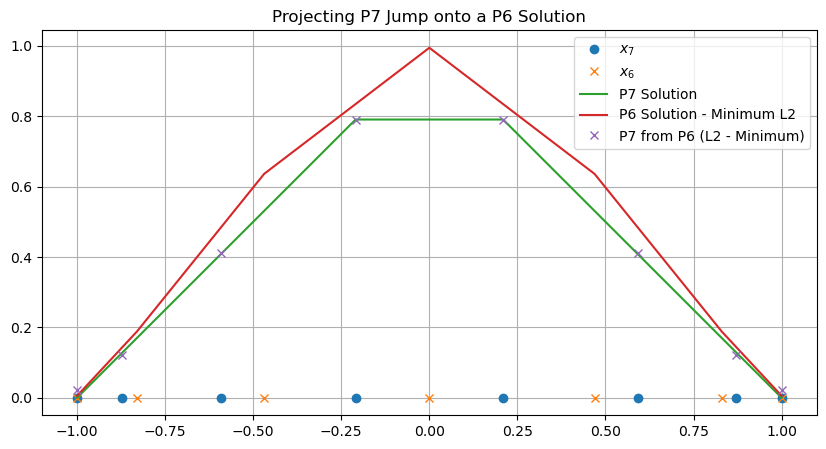

In [42]:
n = 7 
k = 6
x7 , w7 = sb.lgl(n)
x6 , w6 = sb.lgl(k)


##############################################
#G = np.array([sb.lagrange(n,x7[i]) for i in range(n+1)])
L6 = np.array([sb.lagrange(k,x7[i]) for i in range(n+1)]) # Using the 

u7 = triangle(x7)

P6 = np.linalg.inv(sb.sbp_p(k))
P7 = sb.sbp_p(n)

u6 = P6@(L6.T.dot(P7@u7))
##############################################


##############################################
u6_t = u7.T@np.array([sb.lagrange(k,x7[i]) for i in range(n+1)])
u7_6t2 = L6.dot(u6_t)

u7_6t1 = L6.dot(u6)
##############################################




fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x7,np.zeros_like(x7), "o",label="$x_7$")
ax.plot(x6,np.zeros_like(x6), "x",label="$x_6$")
ax.plot(x7,u7,label="P7 Solution")
#ax.plot(x6,u6,label="P6 Solution - Naive")
ax.plot(x6,u6_t,label="P6 Solution - Minimum L2")
#ax.plot(x7,u7_6t2, label="P7 from P6 (Naive-Approach)")
ax.plot(x7,u7_6t1,"x",label="P7 from P6 (L2 - Minimum)")
ax.legend()
ax.grid()
ax.set_title("Projecting P7 Jump onto a P6 Solution")
plt.show()


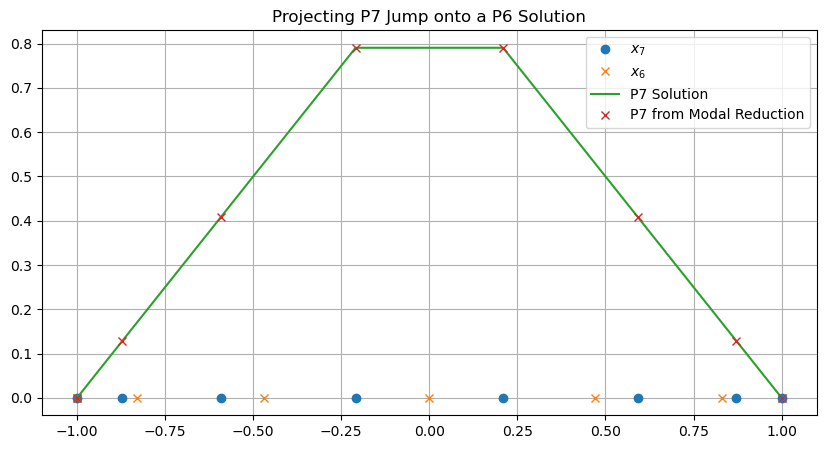

In [51]:
#######
# Vmonde Approach
#######

n = 7 
k = 6
x7 , w7 = sb.lgl(n)
x6 , w6 = sb.lgl(k)


##############################################
#G = np.array([sb.lagrange(n,x7[i]) for i in range(n+1)])
L6 = np.array([sb.lagrange(k,x7[i]) for i in range(n+1)]) # Using the 

u7 = triangle(x7)
u7_m = modal_frequency_reduction(u7, x7, w7)
##############################################




fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x7,np.zeros_like(x7), "o",label="$x_7$")
ax.plot(x6,np.zeros_like(x6), "x",label="$x_6$")
ax.plot(x7,u7,label="P7 Solution")
#ax.plot(x6,u6,label="P6 Solution - Naive")
#ax.plot(x6,u6_t,label="P6 Solution - Minimum L2")
#ax.plot(x7,u7_6t2, label="P7 from P6 (Naive-Approach)")
ax.plot(x7,u7_m,"x",label="P7 from Modal Reduction")
ax.legend()
ax.grid()
ax.set_title("Projecting P7 Jump onto a P6 Solution")
plt.show()


In [90]:
#######
# Testing the Sensor with Both Approaches on the Step-Jump
#######

##############################################################
###################### Functions #############################

# This function is for converting from nodal to modal represntation of the solution vecotr
def nodal_to_modal(u, x, w):
    """
    Convert nodal values u at points x with weights w
    into modal Legendre coefficients a.
    
    u : array_like, shape (n+1,)   — nodal values
    x : array_like, shape (n+1,)   — LGL nodes
    w : array_like, shape (n+1,)   — corresponding LGL weights
    
    returns
    a : ndarray, shape (n+1,)      — modal Legendre coefficients
    """
    n = len(u) - 1
    
    # 1) Build Legendre‐Vandermonde: V[j,i] = P_i(x[j]) for i=0..n
    V = legvander(x, n)           # shape = (n+1, n+1)
    
    # 2) Compute weighted inner‐products β_i = Σ_j w[j]*P_i(x[j])*u[j]
    beta = V.T.dot(w * u)         # shape = (n+1,)
    
    # 3) Scale by (2i+1)/2 to get a_i
    i = np.arange(n+1)
    a = beta * (2*i + 1) / 2      # shape = (n+1,)
    return a

# This function takes in a lower order solution and kills the highest frequency 
def modal_frequency_reduction(u, x, w):
    """
    Convert nodal values u at points x with weights w
    into modal Legendre coefficients a.
    
    u : array_like, shape (n+1,)   — nodal values
    x : array_like, shape (n+1,)   — LGL nodes
    w : array_like, shape (n+1,)   — corresponding LGL weights
    
    returns
    a : ndarray, shape (n+1,)      — modal Legendre coefficients
    """
    n = len(u) - 1
    
    # 1) Build Legendre‐Vandermonde: V[j,i] = P_i(x[j]) for i=0..n
    V = legvander(x, n)           # shape = (n+1, n+1)
    
    # 2) Compute weighted inner‐products β_i = Σ_j w[j]*P_i(x[j])*u[j]
    beta = V.T.dot(w * u)         # shape = (n+1,)
    
    # 3) Scale by (2i+1)/2 to get a_i
    i = np.arange(n+1)
    a = beta * (2*i + 1) / 2      # shape = (n+1,)
    
    # 4) Killing the highest frequency term
    a[-1] = 0
    
    # 5) Return Modal to Nodal 
    a = V.dot(a)
    return a

# This function calculates the energy of the highest mode in a modal representation of a solution
def fractional_energy_highest_mode(a):
    """
    Compute the fraction of total L²‐energy contained in the highest Legendre mode.
    
    Parameters
    ----------
    a : array_like, shape (n+1,)
        Modal coefficients [a₀, a₁, …, aₙ] of a polynomial of degree n.
    
    Returns
    -------
    float
        Fractional energy in mode n:
          Eₙ / Σ_{i=0}ⁿ Eᵢ,
        where Eᵢ = aᵢ²·(2/(2i+1)).
    """
    a = np.asarray(a)
    n = a.size - 1
    i = np.arange(a.size)
    # energy in each mode: E[i] = a[i]**2 * (2/(2*i+1))
    E = a**2 / (2/(2*i + 1))
    return E[n] / E.sum()


###################### Functions #############################
##############################################################


##############################################################
################ Beggining of Program ########################

E   = np.zeros(11)
E_n = np.zeros(11)
E_m = np.zeros(11)
for i in range(10):
    n = i+2 
    k = i+1
    x7 , w7 = sb.lgl(n)
    x6 , w6 = sb.lgl(k)


##############################################
#G = np.array([sb.lagrange(n,x7[i]) for i in range(n+1)])
    L6 = np.array([sb.lagrange(k,x7[i]) for i in range(n+1)]) # Using the 

    u7 = np.where(x7 < 0, 0.0, 1.0)

#################################
# Interpolation onto a lower solution order 
    P6 = np.linalg.inv(sb.sbp_p(k))
    P7 = sb.sbp_p(n)

    u_lower = P6@(L6.T.dot(P7@u7))
# Interpolation back to original solution degree
    u7_n = L6.dot(u_lower)
#################################


#################################
# Projection to the modal space and killing the highest frequency
    u7_m = nodal_to_modal(u7,x7,w7)
    u7_m[-1] = 0
    u7_kill = modal_frequency_reduction(u7_m,x7,w7)
#################################

#################################
## Calcating the energy of the Solution 

# Projecting the Nodal solution onto the modal space 
    u7_nm = nodal_to_modal(u7_n,x7,w7)
# Calculating the fractional energy of the nodal approach
    E_n[i]   = fractional_energy_highest_mode(u7_nm)

# Calculating the fractional energy of the modal approach 
    E_m[i]   = fractional_energy_highest_mode(u7_m)

# Calculating the fractional energy of the un-modified jump
    u7_um    = nodal_to_modal(u7,x7,w7)
    E[i]     = fractional_energy_highest_mode(u7_um)
    
    
    #######################################################
    # Comparing the Scaling of the Sensor - From Persson 
    
    diff_n = u7_um-u7_nm
    diff_m = u7_um-u7_m
    S_n = np.log(diff_n.T.dot(P7@diff_n)/(u7_um.T.dot(P7@u7_um)))
    S_m = (n**2)*diff_m.T.dot(P7@diff_m)/(u7_um.T.dot(P7@u7_um))
    
    
    #######################################################
    
    print("============================================================")
    print(f"Finished Calculating the Fractional Energy of {i+1}th Mode")
    print(f"Persson Sensor using the Nodal Interpolation Approach S_n = {S_n}")
    print(f"Persson Sensor using the Modal Projection Approach    S_m = {S_m}")
    print(f"Nodal Energy Approach = {E_n[i]}")
    print(f"Modal Energy Approach = {E_m[i]}")
    print(f"Energy of the unmodified jump = {E[i]}")
    print("============================================================")



Finished Calculating the Fractional Energy of 1th Mode
Persson Sensor using the Nodal Interpolation Approach S_n = -0.7407752295491995
Persson Sensor using the Modal Projection Approach    S_m = 1.1627906976744184
Nodal Energy Approach = 4.952391285567178e-31
Modal Energy Approach = 0.0
Energy of the unmodified jump = 0.7062146892655367
Finished Calculating the Fractional Energy of 2th Mode
Persson Sensor using the Nodal Interpolation Approach S_n = -2.0509709257492177
Persson Sensor using the Modal Projection Approach    S_m = 1.1574897499300132
Nodal Energy Approach = 4.77496354800804e-31
Modal Energy Approach = 0.0
Energy of the unmodified jump = 0.6218014174925536
Finished Calculating the Fractional Energy of 3th Mode
Persson Sensor using the Nodal Interpolation Approach S_n = -2.467789130292218
Persson Sensor using the Modal Projection Approach    S_m = 1.1609193867151282
Nodal Energy Approach = 1.7446827504902362e-30
Modal Energy Approach = 0.0
Energy of the unmodified jump = 0.5

In [92]:
#######
# Testing the Sensor with Both Approaches on the Triangular Wave
#######

##############################################################
###################### Functions #############################

# This function is for converting from nodal to modal represntation of the solution vecotr
def nodal_to_modal(u, x, w):
    """
    Convert nodal values u at points x with weights w
    into modal Legendre coefficients a.
    
    u : array_like, shape (n+1,)   — nodal values
    x : array_like, shape (n+1,)   — LGL nodes
    w : array_like, shape (n+1,)   — corresponding LGL weights
    
    returns
    a : ndarray, shape (n+1,)      — modal Legendre coefficients
    """
    n = len(u) - 1
    
    # 1) Build Legendre‐Vandermonde: V[j,i] = P_i(x[j]) for i=0..n
    V = legvander(x, n)           # shape = (n+1, n+1)
    
    # 2) Compute weighted inner‐products β_i = Σ_j w[j]*P_i(x[j])*u[j]
    beta = V.T.dot(w * u)         # shape = (n+1,)
    
    # 3) Scale by (2i+1)/2 to get a_i
    i = np.arange(n+1)
    a = beta * (2*i + 1) / 2      # shape = (n+1,)
    return a

# This function takes in a lower order solution and kills the highest frequency 
def modal_frequency_reduction(u, x, w):
    """
    Convert nodal values u at points x with weights w
    into modal Legendre coefficients a.
    
    u : array_like, shape (n+1,)   — nodal values
    x : array_like, shape (n+1,)   — LGL nodes
    w : array_like, shape (n+1,)   — corresponding LGL weights
    
    returns
    a : ndarray, shape (n+1,)      — modal Legendre coefficients
    """
    n = len(u) - 1
    
    # 1) Build Legendre‐Vandermonde: V[j,i] = P_i(x[j]) for i=0..n
    V = legvander(x, n)           # shape = (n+1, n+1)
    
    # 2) Compute weighted inner‐products β_i = Σ_j w[j]*P_i(x[j])*u[j]
    beta = V.T.dot(w * u)         # shape = (n+1,)
    
    # 3) Scale by (2i+1)/2 to get a_i
    i = np.arange(n+1)
    a = beta * (2*i + 1) / 2      # shape = (n+1,)
    
    # 4) Killing the highest frequency term
    a[-1] = 0
    
    # 5) Return Modal to Nodal 
    a = V.dot(a)
    return a

# This function calculates the energy of the highest mode in a modal representation of a solution
def fractional_energy_highest_mode(a):
    """
    Compute the fraction of total L²‐energy contained in the highest Legendre mode.
    
    Parameters
    ----------
    a : array_like, shape (n+1,)
        Modal coefficients [a₀, a₁, …, aₙ] of a polynomial of degree n.
    
    Returns
    -------
    float
        Fractional energy in mode n:
          Eₙ / Σ_{i=0}ⁿ Eᵢ,
        where Eᵢ = aᵢ²·(2/(2i+1)).
    """
    a = np.asarray(a)
    n = a.size - 1
    i = np.arange(a.size)
    # energy in each mode: E[i] = a[i]**2 * (2/(2*i+1))
    E = a**2 / (2/(2*i + 1))
    return E[n] / E.sum()


###################### Functions #############################
##############################################################


##############################################################
################ Beggining of Program ########################

E   = np.zeros(11)
E_n = np.zeros(11)
E_m = np.zeros(11)
for i in range(10):
    n = i+2 
    k = i+1
    x7 , w7 = sb.lgl(n)
    x6 , w6 = sb.lgl(k)


##############################################
#G = np.array([sb.lagrange(n,x7[i]) for i in range(n+1)])
    L6 = np.array([sb.lagrange(k,x7[i]) for i in range(n+1)]) # Using the 

    u7 = triangle(x7)

#################################
# Interpolation onto a lower solution order 
    P6 = np.linalg.inv(sb.sbp_p(k))
    P7 = sb.sbp_p(n)

    u_lower = P6@(L6.T.dot(P7@u7))
# Interpolation back to original solution degree
    u7_n = L6.dot(u_lower)
#################################


#################################
# Projection to the modal space and killing the highest frequency
    u7_m = nodal_to_modal(u7,x7,w7)
    u7_m[-1] = 0
    u7_kill = modal_frequency_reduction(u7_m,x7,w7)
#################################

#################################
## Calcating the energy of the Solution 

# Projecting the Nodal solution onto the modal space 
    u7_nm = nodal_to_modal(u7_n,x7,w7)
# Calculating the fractional energy of the nodal approach
    E_n[i]   = fractional_energy_highest_mode(u7_nm)

# Calculating the fractional energy of the modal approach 
    E_m[i]   = fractional_energy_highest_mode(u7_m)

# Calculating the fractional energy of the un-modified jump
    u7_um    = nodal_to_modal(u7,x7,w7)
    E[i]     = fractional_energy_highest_mode(u7_um)
    
    
    #######################################################
    # Comparing the Scaling of the Sensor - From Persson 
    
    diff_n = u7_um-u7_nm
    diff_m = u7_um-u7_m
    S_n = (n**3)*diff_n.T.dot(P7@diff_n)/(u7_um.T.dot(P7@u7_um))
    S_m = (n**3)*diff_m.T.dot(P7@diff_m)/(u7_um.T.dot(P7@u7_um))
    
    
    #######################################################
    
    print("============================================================")
    print(f"Finished Calculating the Fractional Energy of {i+1}th Mode")
    print(f"Persson Sensor using the Nodal Interpolation Approach S_n = {S_n}")
    print(f"Persson Sensor using the Modal Projection Approach    S_m = {S_m}")
    print(f"Nodal Energy Approach = {E_n[i]}")
    print(f"Modal Energy Approach = {E_m[i]}")
    print(f"Energy of the unmodified jump = {E[i]}")
    print("============================================================")



Finished Calculating the Fractional Energy of 1th Mode
Persson Sensor using the Nodal Interpolation Approach S_n = 6.89655172413793
Persson Sensor using the Modal Projection Approach    S_m = 6.89655172413793
Nodal Energy Approach = 0.0
Modal Energy Approach = 0.0
Energy of the unmodified jump = 0.9689922480620154
Finished Calculating the Fractional Energy of 2th Mode
Persson Sensor using the Nodal Interpolation Approach S_n = 8.099999999999993
Persson Sensor using the Modal Projection Approach    S_m = 2.001229356574282e-31
Nodal Energy Approach = 6.917829874577763e-31
Modal Energy Approach = 0.0
Energy of the unmodified jump = 5.188372405933327e-32
Finished Calculating the Fractional Energy of 3th Mode
Persson Sensor using the Nodal Interpolation Approach S_n = 3.156735655711052
Persson Sensor using the Modal Projection Approach    S_m = 3.156735655711052
Nodal Energy Approach = 0.0
Modal Energy Approach = 0.0
Energy of the unmodified jump = 0.3923061885992318
Finished Calculating th